In [ ]:
!pip install pymongo

In [ ]:
!pip install "pymongo[srv]"

In [ ]:
import pymongo
from pymongo import MongoClient
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#CONNECTION_STRING =  enter your connection


client = MongoClient(CONNECTION_STRING)

In [ ]:
# Create a new database called 'mnist_database'
db = client['mnistdata']

# Create a new collection called 'mnist_collection'
collection = db['mnistcluster']

In [ ]:
from PIL import Image
import io
import numpy as np

# Load the MNIST dataset from TensorFlow
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Function to convert a NumPy array image to binary
def array_to_binary(image_array):
    # Convert 2D image array to 3D by adding a single channel dimension
    image_array = np.expand_dims(image_array, axis=-1)

    # Ensure the array is in the range 0-255 and is of type uint8
    image_array = np.clip(image_array, 0, 255).astype(np.uint8)

    # Convert the NumPy array to a PIL Image
    image_pil = Image.fromarray(image_array.squeeze(), mode='L')

    # Save the PIL Image to a binary stream
    with io.BytesIO() as buf:
        image_pil.save(buf, format='PNG')
        return buf.getvalue()

batch_size = 1000
batch = []

for i in range(len(train_images)):
    binary_image = array_to_binary(train_images[i])
    image_document = {
        'label': int(train_labels[i]),
        'image': binary_image
    }
    batch.append(image_document)

    if len(batch) == batch_size:
        collection.insert_many(batch)
        batch = []

# Insert any remaining documents
if batch:
    collection.insert_many(batch)

print("MNIST images and labels uploaded successfully!")


11490434/11490434 [==============================] - 0s 0us/step
MNIST images and labels uploaded successfully!


In [ ]:
# Count the number of documents in the collection
document_count = collection.count_documents({})
print(f"Number of documents in the collection: {document_count}")


Number of documents in the collection: 63237


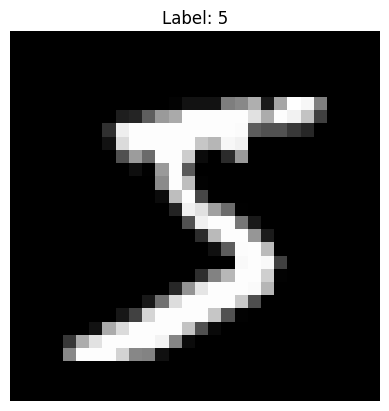

In [ ]:
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt

# Retrieve a sample document
sample_document = collection.find_one()

# Extract the binary image data and label
binary_image = sample_document['image']
label = sample_document['label']

# Convert binary image back to PIL Image
image_pil = Image.open(io.BytesIO(binary_image))

# Display the image and label
plt.imshow(image_pil, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input images
    Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2902 - accuracy: 0.9173 - val_loss: 0.1611 - val_accuracy: 0.9539
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1324 - accuracy: 0.9613 - val_loss: 0.1167 - val_accuracy: 0.9658
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0903 - accuracy: 0.9722 - val_loss: 0.1050 - val_accuracy: 0.9707
Epoch 4/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0676 - accuracy: 0.9792 - val_loss: 0.0957 - val_accuracy: 0.9733
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0514 - accuracy: 0.9841 - val_loss: 0.0972 - val_accuracy: 0.9697


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0851 - accuracy: 0.9725
Test accuracy: 0.9725


313/313 [==============================] - 1s 4ms/step
Predicted label for the first test image: 7


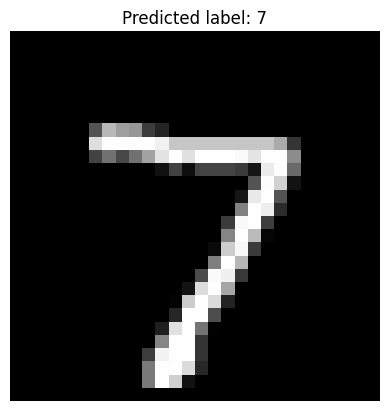

In [ ]:
import matplotlib.pyplot as plt

# Make predictions
predictions = model.predict(test_images)

# Predict the label for the first image in the test set
import numpy as np
predicted_label = np.argmax(predictions[0])

# Print the predicted label
print(f"Predicted label for the first test image: {predicted_label}")

# Plot the first test image
plt.imshow(test_images[0], cmap='gray')
plt.title(f"Predicted label: {predicted_label}")
plt.axis('off')  # Hide the axis
plt.show()


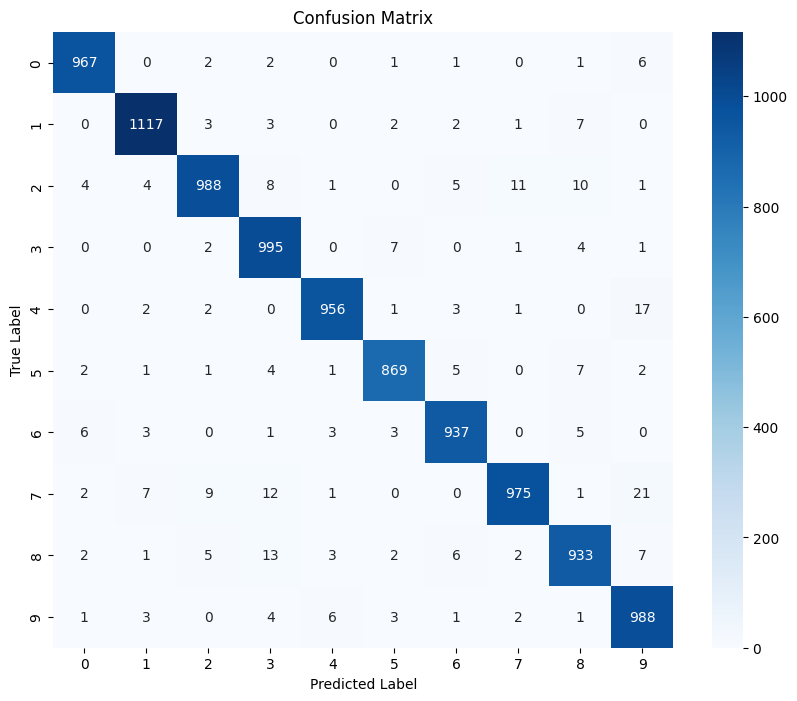

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions for the test set
predicted_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(np.argmax(test_labels, axis=1), predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()